# Project: Diamond Price Analysis

## Background
This project will be working with the Diamonds dataset. This dataset contains information about several thousand
diamonds sold in the United States. The dataset contains 53940 with each diamond in the dataset having 10 attributes recorded for it, but the focus will only be
interested in the following 5 attributes:
- price - The sales price of the diamond, in US Dollars.
- carat - The weight of the diamond, measured in carats. One carat is 200 mg.
- cut - Quality of the cut of the diamond. The levels (from worst to best) are Fair, Good, Very Good, Premium, and
Ideal.
- color - Level of the tint in the diamond. Colorless diamonds are generally preferred. The levels of this variable
(from worst to best) are: J, I, H, G, F, E, and D.
- clarity - Indicates the level of internal defects in the diamond. The levels (from worst to best) are: I1, SI2, SI1,
VS2, VS1, VVS2, VVS1, IF.

The  goal is to create and compare two linear regression models to estimate the label ln_price. The first model will use ln_carat as the only feature. The second will use ln_carat, cut, color, and clarity as features. 

Importing packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

Loading the dataset and viewing the top 10 rows

In [2]:
diamonds = pd.read_csv('diamonds.txt', sep='\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Displaying the shape and DataFrame containing descriptive statistics for each
of the columns. 

In [3]:
diamonds.shape

(53940, 10)

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Exploratory Data Analysis

### Filtering the dataset to retrieve information about the 5 most expensive diamonds  

In [5]:
diamonds.loc[:,['price','carat','cut','color','clarity']].\
  sort_values('price',ascending=False).\
  head(5)

,price,carat,cut,color,clarity
27750,18823,2.29,Premium,I,VS2
27749,18818,2.00,Very Good,G,SI1
27748,18806,1.51,Ideal,G,IF
27747,18804,2.07,Ideal,G,SI2
27746,18803,2.00,Very Good,H,SI1


### Retrieving information about the least expensive diamonds

In [6]:
diamonds.loc[:,['price','carat','cut','color','clarity']].\
  sort_values('price',ascending=True).\
  head(5)

,price,carat,cut,color,clarity
1,326,0.23,Ideal,E,SI2
2,326,0.21,Premium,E,SI1
3,327,0.23,Good,E,VS1
4,334,0.29,Premium,I,VS2
5,335,0.31,Good,J,SI2


### Retrieving informatiom about the 5 largest diamonds in the dataset with an ideal cut

In [7]:
diamonds.loc[diamonds.cut == 'Ideal',['price','carat','cut','color','clarity']].\
   sort_values('carat',ascending=False).\
  head(5)

,price,carat,cut,color,clarity
24329,12587,3.50,Ideal,H,I1
24298,12545,3.22,Ideal,I,I1
26468,16037,3.01,Ideal,J,SI2
26745,16538,3.01,Ideal,J,I1
24785,13156,2.75,Ideal,D,I1


### Retrieving information about the 5 largest diamonds in the dataset with an fair cut

In [8]:
diamonds.loc[diamonds.cut == 'Fair',['price','carat','cut','color','clarity']].\
   sort_values('carat',ascending=False).\
  head(5)

,price,carat,cut,color,clarity
27416,18018,5.01,Fair,J,I1
27631,18531,4.50,Fair,J,I1
27131,17329,4.13,Fair,H,I1
23645,11668,3.65,Fair,H,I1
26432,15964,3.40,Fair,D,I1


## Working with categorical variables
The columns cut, color, and clarity are categorical variables whose values represent discrete categories that the diamonds can be classified into with the levels of each of the variables having a natural ordering or ranking. The sections below involves working with the categorical variables by creating lists to specify the order for each of the three categorical variables.

##### Creating lists named clarity_levels, cut_levels, and color_levels with each list containing strings representing the levels of the associated categorical variable in order from worst to best. 

In [13]:
# # create list cut_levels and reordering variables in order from worst to best:I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF
clarity_levels = diamonds.clarity.unique()
order_clarity = [6,0,1,3,2,4,5,7]

clarity_levels = [clarity_levels[i] for i in order_clarity]

print(clarity_levels)

print(' ')
# create list cut_levels and reordering variables in order from worst to best: Fair, Good, Very Good, Premium, and Ideal
cut_levels = diamonds.cut.unique()
order_cut = [4, 2,3,1,0]
cut_levels = [cut_levels[i] for i in order_cut]
cut_levels
print(cut_levels)
# create list color_levels and reordering variables in order from worst to best: J, I, H, G, F, E, and D
color_levels = diamonds.color.unique() 

print(' ')
order_color = [2,1,3,5,4,0,6]

color_levels = [color_levels[i] for i in order_color]
color_levels
print(color_levels)

['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
 
['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
 
['J', 'I', 'H', 'G', 'F', 'E', 'D']


To specify the correct order for the levels of the three categorical variables in the dataset using order for the levels stored as a column in a DataFrame by using the pd.Categorical() function

In [14]:
diamonds.clarity = pd.Categorical(diamonds.clarity, clarity_levels)
diamonds.clarity

1        SI2
2        SI1
3        VS1
4        VS2
5        SI2
        ... 
53936    SI1
53937    SI1
53938    SI1
53939    SI2
53940    SI2
Name: clarity, Length: 53940, dtype: category
Categories (8, object): ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [15]:
diamonds.cut = pd.Categorical(diamonds.cut, cut_levels)
diamonds.cut

1            Ideal
2          Premium
3             Good
4          Premium
5             Good
           ...    
53936        Ideal
53937         Good
53938    Very Good
53939      Premium
53940        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

In [16]:
diamonds.color = pd.Categorical(diamonds.color, color_levels)
diamonds.color

1        E
2        E
3        E
4        I
5        J
        ..
53936    D
53937    D
53938    D
53939    H
53940    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [17]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


 ## Displaying Counts for Categorical Variables.
 This section involves retrieving informations about diamonds with each level of each of the three categorical variables, level of colors and color of clarity

In [18]:
diamonds.cut.value_counts().sort_index()

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

In [19]:
diamonds.color.value_counts().sort_index()

J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: color, dtype: int64

In [20]:
diamonds.clarity.value_counts().sort_index()

I1        741
SI2      9194
SI1     13065
VS2     12258
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
Name: clarity, dtype: int64

## Visualization
I will be exploring the relationship between the price and carat, clarity and price, clarity levels attributes by generating Scatter Plots and Histograms

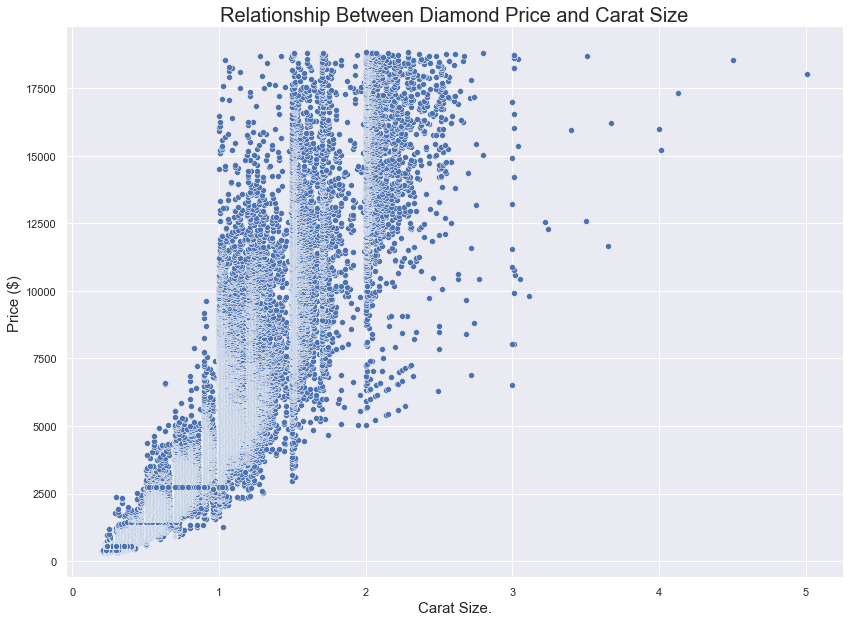

In [31]:

sns.relplot(x=diamonds.carat, y=diamonds.price, data=diamonds, height=8.27, aspect=11.7/8.27)
plt.xlabel('Carat Size.', fontsize = 15)
plt.ylabel('Price ($)', fontsize = 15)
plt.title('Relationship Between Diamond Price and Carat Size', fontsize = 20)
plt.show()

The plot shows an uphill pattern from left to right which indicates a positive relationship between Price and Carat Size.

#### Exploring the relationship between Price, Carat Size and Clarity Levels

<function matplotlib.pyplot.show(*args, **kw)>

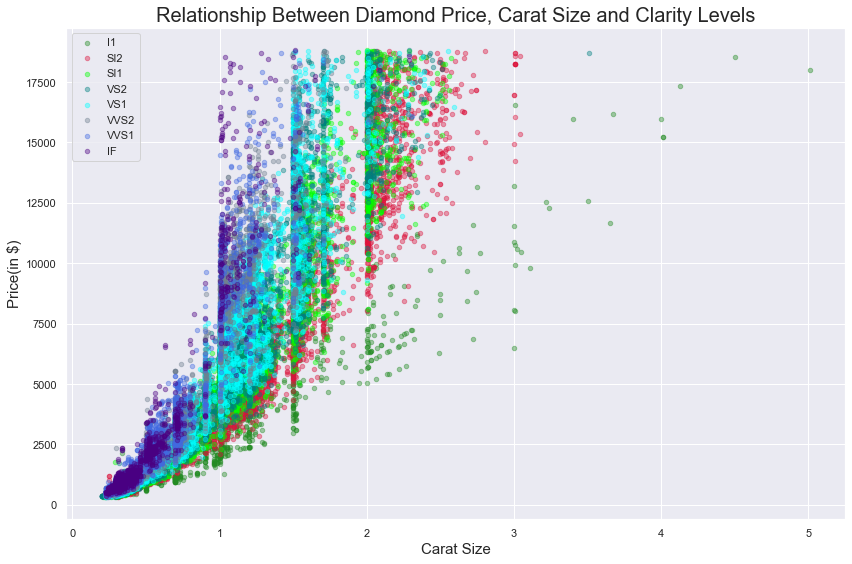

In [44]:
clarity_pal = ['forestgreen','crimson','lime','teal','aqua','slategrey','royalblue','indigo']

plt.figure(figsize = [12,8])
for i in range(0,len(clarity_levels)):
    temp = diamonds[diamonds.clarity == clarity_levels[i]]

    
    plt.scatter(x = temp.carat, y = temp.price, alpha = 0.4, s= 20,color = clarity_pal[i], label = clarity_levels[i])
    plt.xlabel('Carat Size',fontsize = 15)
    plt.ylabel('Price($)', fontsize = 15)
    plt.title('Relationship Between Diamond Price, Carat Size and Clarity Levels', fontsize = 20)
    plt.legend()
plt.tight_layout()
plt.show

## Calculating the Mean Price and Carat Size for each level of variable Cut and using Bar Charts to graphically display the relationship between Cut, Mean Price and Carat Size
A new dataframe named gb_cut will be created for cut, price, and carat

In [45]:

gb_cut = diamonds[['cut','price','carat']].groupby('cut',as_index = False).mean()
gb_cut


,cut,price,carat
0,Fair,4358.757764,1.046137
1,Good,3928.864452,0.849185
2,Very Good,3981.759891,0.806381
3,Premium,4584.257704,0.891955
4,Ideal,3457.541970,0.702837


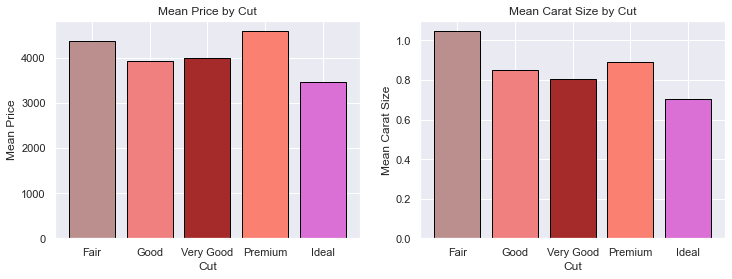

In [47]:
A = gb_cut.cut
B = gb_cut.price
C = gb_cut.carat
cut_pal = ['rosybrown','lightcoral','brown','salmon','orchid']
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.bar(A, height= B, edgecolor='black', color=cut_pal)
plt.title('Mean Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(A, height= C, edgecolor='black', color=cut_pal)
plt.title('Mean Carat Size by Cut')
plt.xlabel('Cut')
plt.ylabel('Mean Carat Size')

plt.show()

## Calculating the Mean Price and Carat Size for each level of Color and using Bar Charts to graphically display the relationship between Color, Mean Price and Carat Size.
A new dataframe named gb_color will  be created for color, price, carat

In [48]:
gb_color = diamonds[['color','price','carat']].groupby('color',as_index = False).mean()
gb_color

,color,price,carat
0,J,5323.818020,1.162137
1,I,5091.874954,1.026927
2,H,4486.669196,0.911799
3,G,3999.135671,0.771190
4,F,3724.886397,0.736538
5,E,3076.752475,0.657867
6,D,3169.954096,0.657795


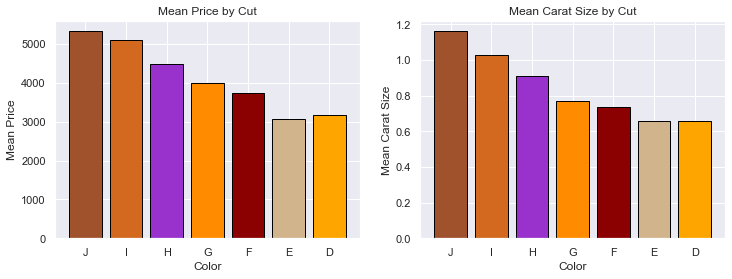

In [49]:
E = gb_color.color
F = gb_color.price
G = gb_color.carat
color_pal = ['sienna','chocolate','darkorchid','darkorange','darkred','tan','orange']
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.bar(E, height= F, edgecolor='black', color=color_pal)
plt.title('Mean Price by Cut')
plt.xlabel('Color')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(E, height= G, edgecolor='black', color=color_pal)
plt.title('Mean Carat Size by Cut')
plt.xlabel('Color')
plt.ylabel('Mean Carat Size')

plt.show()

## Calculating the Mean Price and Carat Size for each level of Clarity and using Bar Charts to graphically display the relationship between Clarity, Mean Price and Carat Size.
A new dataframe named gb_clarity will be created for color, price, carat

In [50]:
gb_clarity = diamonds[['clarity','price','carat']].groupby('clarity',as_index = False).mean()
gb_clarity

,clarity,price,carat
0,I1,3924.168691,1.283846
1,SI2,5063.028606,1.077648
2,SI1,3996.001148,0.850482
3,VS2,3924.989395,0.763935
4,VS1,3839.455391,0.727158
5,VVS2,3283.737071,0.596202
6,VVS1,2523.114637,0.503321
7,IF,2864.839106,0.505123


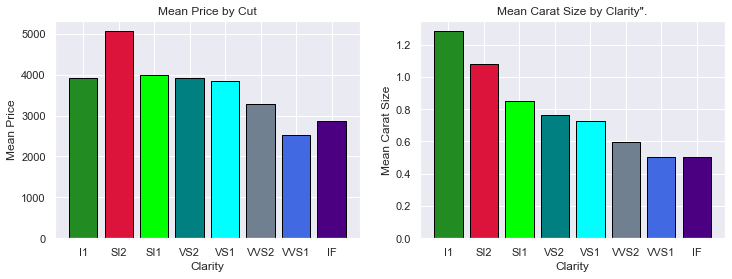

In [51]:
H = gb_clarity.clarity
I = gb_clarity.price
J = gb_clarity.carat
clarity_pal = ['forestgreen','crimson','lime','teal','aqua','slategrey','royalblue','indigo']
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.bar(H, height= I, edgecolor='black', color=clarity_pal)
plt.title('Mean Price by Cut')
plt.xlabel('Clarity')
plt.ylabel('Mean Price')

plt.subplot(1, 2, 2)
plt.bar(H, height= J, edgecolor='black', color=clarity_pal)
plt.title('Mean Carat Size by Clarity".')
plt.xlabel('Clarity')
plt.ylabel('Mean Carat Size')

plt.show()

It is interesting to note that for each of the three categorical variables, higher quality diamonds tend to have a
lower average price and they also tend to be smaller. This can be inferred to mean diamond size has much stronger effect of the price than cut, color, or clarity. 

## Further Exploration of the Relationship Between Price and Carat Size
Based on the difference in the numerical values for price and carat size, there is need to conduct a logarithmic transformation of the columns by creating new columns ln_carat and ln_price that will contain the natural logarithms of the carat and price columns


In [52]:
diamonds['ln_carat'] = np.log(diamonds['carat'])
diamonds['ln_price'] = np.log(diamonds['price'])
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,5.786897
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,5.786897
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,5.789960
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,5.811141
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,5.814131


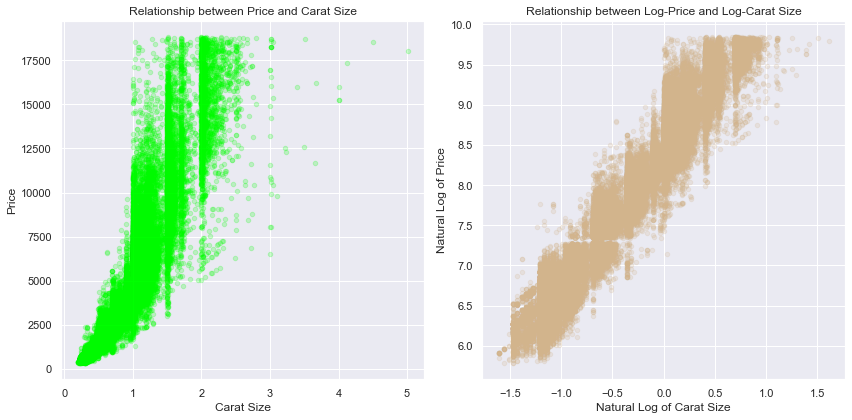

In [53]:
plt.figure(figsize=[12,6])

plt.subplot(1, 2, 1)
plt.scatter(x = diamonds.carat, y = diamonds.price, s=20, alpha=0.2, color = 'lime')

plt.title('Relationship between Price and Carat Size')
plt.xlabel('Carat Size')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(x = diamonds.ln_carat, y = diamonds.ln_price, s=20, alpha=0.2, color = 'tan')
plt.title('Relationship between Log-Price and Log-Carat Size')
plt.xlabel('Natural Log of Carat Size')
plt.ylabel('Natural Log of Price')

plt.tight_layout()
plt.show()

It can be seen that the scatterplots of ln_carat and ln_price indicated an approximately linear relationship

## Predictive Analysis
The goal is to create and compare two linear regression models to estimate the label ln_price. The first model will use
ln_carat as the only feature. The second will use ln_carat, cut, color, and clarity as features. To use the categorical variables in a model, we will need to encode them using one-hot encoding. 

#### Creating a 2D array named X1_num and X1_cat 

In [55]:

X1_num = diamonds.iloc[:,-2].values

# storing X1_num in 2D array
n = len(X1_num)
X1_num = X1_num.reshape(n,1)

# Creating a 2D array named X1_cat by selecting the cut, color, and clarity columns
X1_cat = diamonds.iloc[:,[1,2,3]].values

# Creating a 1D array named y1 by selecting the ln_price column from diamonds
y1 = diamonds.iloc[:,-1].values

print('Numerical Feature Array Shape:  ', X1_num.shape)
print('Categorical Feature Array Shape:', X1_cat.shape)
print('Label Array Shape:              ', y1.shape)

Numerical Feature Array Shape:   (53940, 1)
Categorical Feature Array Shape: (53940, 3)
Label Array Shape:               (53940,)


### Performing one-hot encoding to preprocess the categorical features into numerical vales for machine learning models.

In [56]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(X1_cat)
X1_enc = encoder.transform(X1_cat)

print('Encoded Feature Array Shape:', X1_enc.shape)

Encoded Feature Array Shape: (53940, 20)


Combining the numerical feature array with the encoded categorical feature array

In [58]:
 

X1 = np.hstack([X1_num,X1_enc])

print('Feature Array Shape:', X1.shape)

Feature Array Shape: (53940, 21)


Splitting the data into training, validation, and test sets, using an 80/10/10 split

In [59]:


X1_train, X1_hold, y1_train, y1_hold = train_test_split(X1, y1, test_size = 0.2, random_state=1)
X1_valid, X1_test, y1_valid, y1_test = train_test_split(X1_hold, y1_hold, test_size = 0.5, random_state=1)

print('Training Features Shape:  ', X1_train.shape)
print('Validation Features Shape:', X1_valid.shape)
print('Test Features Shape:      ', X1_test.shape)

Training Features Shape:   (43152, 21)
Validation Features Shape: (5394, 21)
Test Features Shape:       (5394, 21)


### Creating linear regression and fit the model to the training data using only the first (numerical) column of X1_train

In [60]:

x = X1_train[:,0]
n = len(x)
X1_train_temp = x.reshape(n,1)     # reshape X1_train[:,0] to 2D array

# reshape X1_valid to 2D array
w = X1_valid[:,0]
p = len(w)
X1_valid_temp = w.reshape(p,1)


dia_mod_1 = LinearRegression()
dia_mod_1.fit(X1_train_temp, y1_train)

# Calculate the r-squared values for the training and validation set
dia_mod_1_train = dia_mod_1.score(X1_train_temp, y1_train)
dia_mod_1_val = dia_mod_1.score(X1_valid_temp, y1_valid)

print('Training r-Squared:  ',round(dia_mod_1_train,4))
print('Validation r-Squared:',round(dia_mod_1_val,4))

Training r-Squared:   0.933
Validation r-Squared: 0.9348


### Linear Regression Model with Several Features

In [61]:
# linear regression model named dia_mod_2
dia_mod_2 = LinearRegression()
dia_mod_2.fit(X1_train, y1_train)

# Calculate the r-squared values for the training and validation set
dia_mod_2_train = dia_mod_2.score(X1_train, y1_train)
dia_mod_2_val = dia_mod_2.score(X1_valid, y1_valid)

print('Training r-Squared:  ',round(dia_mod_2_train,4))
print('Validation r-Squared:',round(dia_mod_2_val,4))

Training r-Squared:   0.9825
Validation r-Squared: 0.9834


#### Scoring the model dia_mod_2 using the test set

In [62]:

print('Testing r-Squared:  ', round(dia_mod_2.score(X1_test, y1_test),4))

Testing r-Squared:   0.9825


### Using the model to generate price estimates for the diamonds in the test set

In [65]:
test_pred_2 = dia_mod_2.predict(X1_test)

# to display actual and predicted values of prices

print('Observed Labels: ', np.round(np.exp(y1_test[:10])))
print('Estimated Labels:', np.round(np.exp(test_pred_2[:10])))

Observed Labels:  [ 4619.  2479.   675.  1842. 14618.  1759.  1081.  3385. 12918.  4855.]
Estimated Labels: [ 4458.  3025.   526.  1823. 12930.  1906.  1258.  3110. 14534.  5077.]
